In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import timm

In [ ]:
from google.colab import drive
drive.mount("/content/driveG")

Drive already mounted at /content/driveG; to attempt to forcibly remount, call drive.mount("/content/driveG", force_remount=True).


In [ ]:
import torch
import torchvision

from torch import nn
from torchvision import transforms
from driveG.MyDrive.GP1.Graduation_Project_PCOS.going_modular import data_setup, engine
import matplotlib

In [ ]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary


##### Added this block on to the vscode file

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Setup path to PCOS data directory
from pathlib import Path

data_path = Path("/content/driveG/MyDrive/GP1/After_Research_paper/DenseNet_Reimagined/")
image_path = data_path / "newER_data"
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"{image_path} directory not found")

/content/driveG/MyDrive/GP1/After_Research_paper/DenseNet_Reimagined/newER_data directory exists.


In [ ]:
# Setup Directories
train_dir = image_path / "train"
test_dir = image_path / "validation"

In [ ]:
# Create transforms pipeline manually (older method)
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224
    transforms.ToTensor(), # Turn pixel values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]), # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel)
    transforms.Grayscale() ##### change number of color channels from 3 to 1 (I added this)
])

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, 
                                                                               batch_size=32)
train_dataloader, test_dataloader, class_names                                    

(<torch.utils.data.dataloader.DataLoader at 0x7fe56c911d00>,
 ['infected', 'notinfected'])

In [ ]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_

In [ ]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

# DenseNet121 Pre-trained

In [ ]:
DenseNet121_model = timm.create_model("densenet121", pretrained=True, in_chans=1, num_classes=1)
DenseNet121_model = DenseNet121_model.to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


KeyboardInterrupt: ignored

In [ ]:
DenseNet121_model

In [ ]:
DenseNet121_model(torch.rand(1, 1, 224, 224).to(device)).shape

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(DenseNet121_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=DenseNet121_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=15,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

***
# **DenseNet121d** <br> NOTE: This model is NOT pre-trained. Training starts from randomly initiated weights.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
DenseNet121d_model = timm.create_model("densenet121d", pretrained=True, in_chans=1, num_classes=1)
DenseNet121d_model = DenseNet121d_model.to(device)

In [ ]:
DenseNet121d_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (norm0): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (norm1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (norm2): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64

In [ ]:
DenseNet121d_model(torch.rand(1, 1, 224, 224).to(device)).shape

torch.Size([1, 1])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(DenseNet121d_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=DenseNet121d_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=217,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/217 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6926 | train_acc: 0.5230 | test_loss: 0.6864 | test_acc: 0.6596
Epoch: 2 | train_loss: 0.6872 | train_acc: 0.5740 | test_loss: 0.6894 | test_acc: 0.5664
Epoch: 3 | train_loss: 0.6830 | train_acc: 0.5740 | test_loss: 0.6935 | test_acc: 0.5731
Epoch: 4 | train_loss: 0.6799 | train_acc: 0.6135 | test_loss: 0.6952 | test_acc: 0.5809
Epoch: 5 | train_loss: 0.6770 | train_acc: 0.6217 | test_loss: 0.6951 | test_acc: 0.5887
Epoch: 6 | train_loss: 0.6732 | train_acc: 0.6398 | test_loss: 0.6970 | test_acc: 0.5837
Epoch: 7 | train_loss: 0.6718 | train_acc: 0.6793 | test_loss: 0.6973 | test_acc: 0.5999
Epoch: 8 | train_loss: 0.6681 | train_acc: 0.6859 | test_loss: 0.6974 | test_acc: 0.6027
Epoch: 9 | train_loss: 0.6642 | train_acc: 0.7286 | test_loss: 0.6982 | test_acc: 0.5910
Epoch: 10 | train_loss: 0.6627 | train_acc: 0.7270 | test_loss: 0.7006 | test_acc: 0.6183
Epoch: 11 | train_loss: 0.6581 | train_acc: 0.7286 | test_loss: 0.7002 | test_acc: 0.6055
Epoch: 12 | train_l

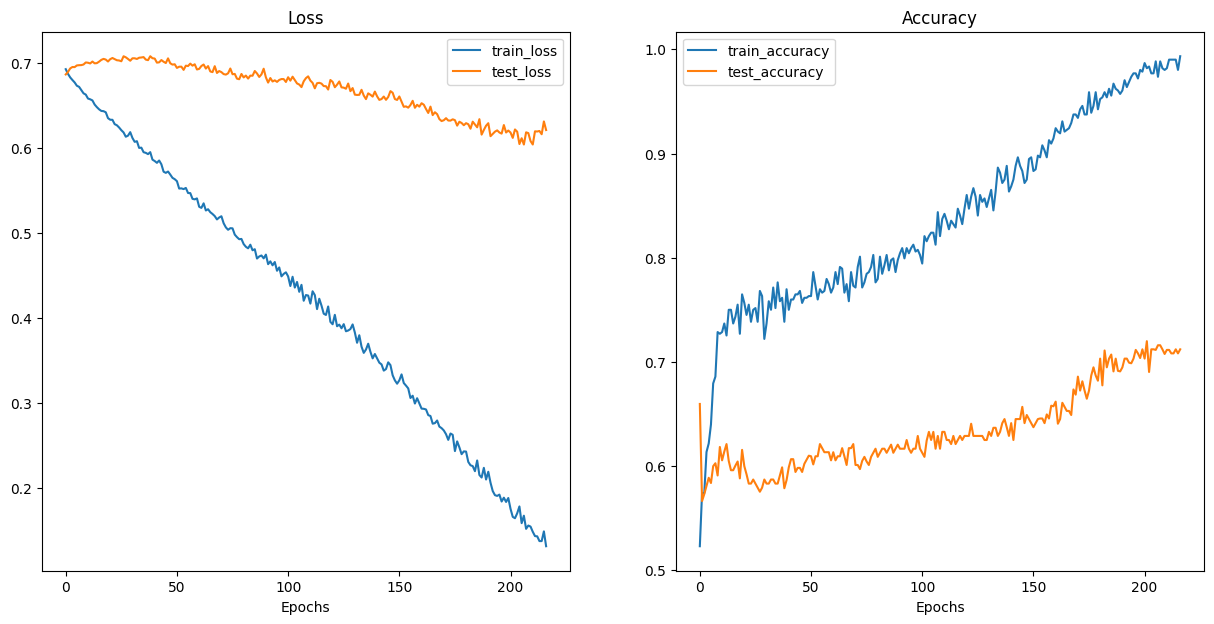

In [ ]:
# Get the plot_loss_curves() funtion from helper_functions.py
from driveG.MyDrive.GP1.Graduation_Project_PCOS.going_modular import helper_functions

helper_functions.plot_loss_curves(results)

In [ ]:
# Plotting confusion matrix
!pip install torchmetrics -U mlxtend # we need mlxtend to plot the condusion matrix
import torchmetrics, mlxtend
print(f"mlxtend version {mlxtend.__version__}") # must be version 0.19.0 or higher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version 0.21.0


In [ ]:
from tqdm.auto import tqdm
y_preds = [] # list for storing the model predictions
y_targets = [] # list for storing the true labels of the test data
DenseNet121d_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."): # X and y are the image and label batches in the test dataloader
    # Send data and labels to target device
    X, y = X.to(device), y.to(device)
    # Add the true labels to the y_targets list
    y_targets.append(y.cpu())
    # Do the forward pass on one batch
    y_logit = DenseNet121d_model(X).squeeze()
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.round(torch.sigmoid(y_logit))
    # append to y_preds list & Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu()) # must be on CPU in order to be visualized

y_pred_tensor = torch.cat(y_preds) # concatenating all the prediction tensors into a single prediction tensor
y_target_tensor = torch.cat(y_targets)
y_pred_tensor[:10], y_target_tensor[:10]

Making Predictions...:   0%|          | 0/8 [00:00<?, ?it/s]

(tensor([0., 1., 1., 0., 0., 0., 1., 0., 0., 0.]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

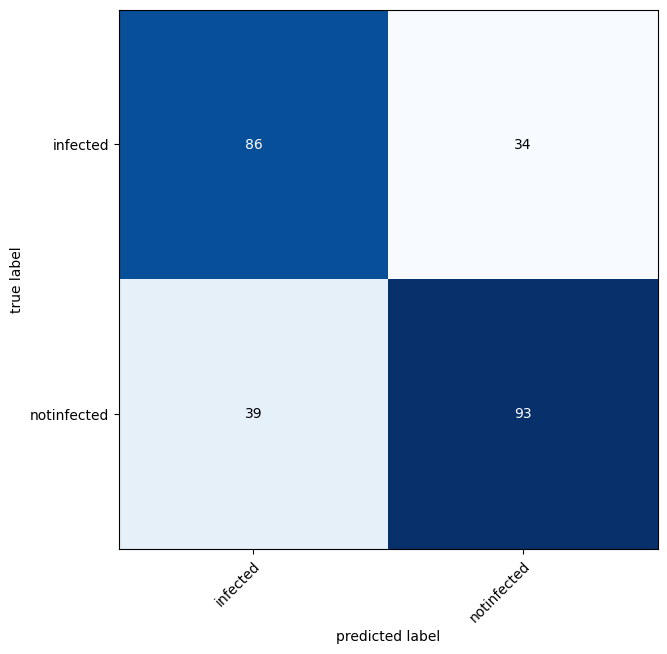

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="binary", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_target_tensor)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names,
    figsize=(10, 7)
)

## Saving the model

In [ ]:
FILE = "/content/driveG/MyDrive/GP1/GP2_timm/DenseNet121d_22_From_Scratch_model0.pth"
torch.save(DenseNet121d_model, FILE)

***
# **DenseNet161**

In [ ]:
DenseNet161_model = timm.create_model("densenet161", pretrained=True, in_chans=1, num_classes=1)
DenseNet161_model = DenseNet161_model.to(device)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [ ]:
DenseNet161_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

In [ ]:
DenseNet161_model(torch.rand(1, 1, 224, 224).to(device)).shape

torch.Size([1, 1])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(DenseNet161_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=DenseNet161_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=15,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6844 | train_acc: 0.5362 | test_loss: 0.7002 | test_acc: 0.5312
Epoch: 2 | train_loss: 0.6518 | train_acc: 0.6727 | test_loss: 0.6876 | test_acc: 0.5257
Epoch: 3 | train_loss: 0.6201 | train_acc: 0.7977 | test_loss: 0.6842 | test_acc: 0.5636
Epoch: 4 | train_loss: 0.5853 | train_acc: 0.8849 | test_loss: 0.6826 | test_acc: 0.5396
Epoch: 5 | train_loss: 0.5547 | train_acc: 0.9161 | test_loss: 0.6808 | test_acc: 0.5441
Epoch: 6 | train_loss: 0.5319 | train_acc: 0.9178 | test_loss: 0.6793 | test_acc: 0.5519
Epoch: 7 | train_loss: 0.4955 | train_acc: 0.9638 | test_loss: 0.6739 | test_acc: 0.5642
Epoch: 8 | train_loss: 0.4620 | train_acc: 0.9622 | test_loss: 0.6697 | test_acc: 0.5558
Epoch: 9 | train_loss: 0.4279 | train_acc: 0.9770 | test_loss: 0.6691 | test_acc: 0.5714
Epoch: 10 | train_loss: 0.4013 | train_acc: 0.9803 | test_loss: 0.6640 | test_acc: 0.5910
Epoch: 11 | train_loss: 0.3767 | train_acc: 0.9770 | test_loss: 0.6646 | test_acc: 0.5792
Epoch: 12 | train_l

***
# **DenseNet201**

In [ ]:
DenseNet201_model = timm.create_model("densenet201", pretrained=True, in_chans=1, num_classes=1)
DenseNet201_model = DenseNet201_model.to(device)
DenseNet201_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

In [ ]:
DenseNet201_model(torch.rand(1, 1, 224, 224).to(device)).shape

torch.Size([1, 1])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(DenseNet201_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=DenseNet201_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=15,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6900 | train_acc: 0.5428 | test_loss: 0.7400 | test_acc: 0.4816
Epoch: 2 | train_loss: 0.6530 | train_acc: 0.6809 | test_loss: 0.7254 | test_acc: 0.4972
Epoch: 3 | train_loss: 0.6119 | train_acc: 0.7928 | test_loss: 0.7031 | test_acc: 0.4894
Epoch: 4 | train_loss: 0.5736 | train_acc: 0.8684 | test_loss: 0.6867 | test_acc: 0.5770
Epoch: 5 | train_loss: 0.5367 | train_acc: 0.9243 | test_loss: 0.6854 | test_acc: 0.5028
Epoch: 6 | train_loss: 0.5097 | train_acc: 0.9293 | test_loss: 0.6717 | test_acc: 0.5787
Epoch: 7 | train_loss: 0.4694 | train_acc: 0.9572 | test_loss: 0.6680 | test_acc: 0.6278
Epoch: 8 | train_loss: 0.4278 | train_acc: 0.9753 | test_loss: 0.6573 | test_acc: 0.6244
Epoch: 9 | train_loss: 0.3931 | train_acc: 0.9836 | test_loss: 0.6506 | test_acc: 0.6217
Epoch: 10 | train_loss: 0.3608 | train_acc: 0.9868 | test_loss: 0.6354 | test_acc: 0.6808
Epoch: 11 | train_loss: 0.3364 | train_acc: 0.9819 | test_loss: 0.6356 | test_acc: 0.6256
Epoch: 12 | train_l

## So DenseNet201 did much better than DenseNet161 <br> Its not ideal but at least it learned some features and the performace is somewhat acceptable as shown later by the confusion matrix...

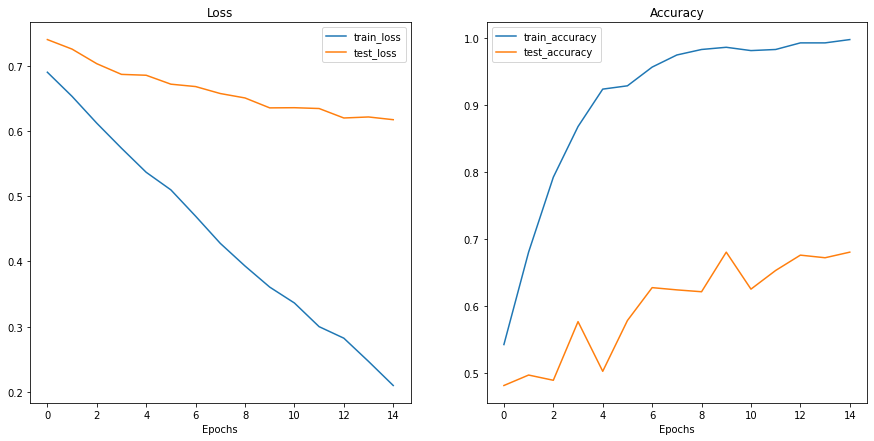

In [ ]:
# Get the plot_loss_curves() funtion from helper_functions.py
from driveG.MyDrive.GP1.Graduation_Project_PCOS.going_modular import helper_functions

helper_functions.plot_loss_curves(results)

In [ ]:
# Plotting confusion matrix
!pip install torchmetrics -U mlxtend # we need mlxtend to plot the condusion matrix
import torchmetrics, mlxtend
print(f"mlxtend version {mlxtend.__version__}") # must be version 0.19.0 or higher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version 0.21.0


In [ ]:
from tqdm.auto import tqdm
y_preds = [] # list for storing the model predictions
y_targets = [] # list for storing the true labels of the test data
DenseNet201_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."): # X and y are the image and label batches in the test dataloader
    # Send data and labels to target device
    X, y = X.to(device), y.to(device)
    # Add the true labels to the y_targets list
    y_targets.append(y.cpu())
    # Do the forward pass on one batch
    y_logit = DenseNet201_model(X).squeeze()
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.round(torch.sigmoid(y_logit))
    # append to y_preds list & Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu()) # must be on CPU in order to be visualized

y_pred_tensor = torch.cat(y_preds) # concatenating all the prediction tensors into a single prediction tensor
y_target_tensor = torch.cat(y_targets)
y_pred_tensor[:10], y_target_tensor[:10]

Making Predictions...:   0%|          | 0/8 [00:00<?, ?it/s]

(tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

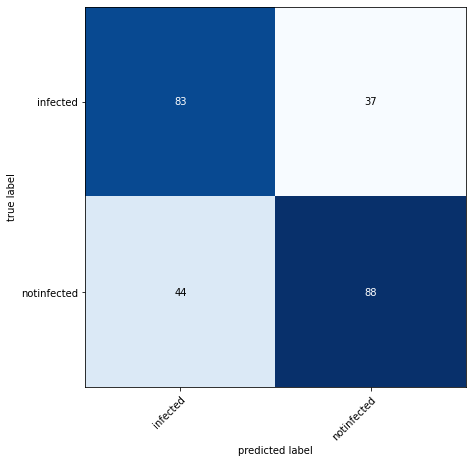

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="binary", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_target_tensor)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names,
    figsize=(10, 7)
)

***

# **DenseNet264** <br> NOTE: This model does not have pretrained weights!!

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
DenseNet264_model = timm.create_model("densenet264", pretrained=True, in_chans=1, num_classes=1)
DenseNet264_model = DenseNet264_model.to(device)
DenseNet264_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNormAct2d(
          192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
  

In [ ]:
DenseNet264_model(torch.rand(1, 1, 224, 224).to(device)).shape

torch.Size([1, 1])

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(DenseNet264_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=DenseNet264_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=300,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6887 | train_acc: 0.4819 | test_loss: 0.7037 | test_acc: 0.4085
Epoch: 2 | train_loss: 0.6776 | train_acc: 0.5345 | test_loss: 0.7135 | test_acc: 0.5184
Epoch: 3 | train_loss: 0.6701 | train_acc: 0.5592 | test_loss: 0.7126 | test_acc: 0.4637
Epoch: 4 | train_loss: 0.6629 | train_acc: 0.6168 | test_loss: 0.7162 | test_acc: 0.5140
Epoch: 5 | train_loss: 0.6544 | train_acc: 0.6299 | test_loss: 0.7144 | test_acc: 0.5251
Epoch: 6 | train_loss: 0.6476 | train_acc: 0.6447 | test_loss: 0.7104 | test_acc: 0.4308
Epoch: 7 | train_loss: 0.6433 | train_acc: 0.6793 | test_loss: 0.7178 | test_acc: 0.5977
Epoch: 8 | train_loss: 0.6353 | train_acc: 0.6974 | test_loss: 0.7067 | test_acc: 0.4833
Epoch: 9 | train_loss: 0.6267 | train_acc: 0.7155 | test_loss: 0.7084 | test_acc: 0.5675
Epoch: 10 | train_loss: 0.6260 | train_acc: 0.7451 | test_loss: 0.7066 | test_acc: 0.4911
Epoch: 11 | train_loss: 0.6163 | train_acc: 0.7220 | test_loss: 0.7015 | test_acc: 0.5190
Epoch: 12 | train_l

# So out of the DenseNet models, DenseNet201 and DenseNet121d until epoch 224,245,262 were the best performing ones.

***

# **Inception_v3**

In [ ]:
inception_v3_model = timm.create_model("inception_v3", pretrained=True, in_chans=1, num_classes=1)
inception_v3_model = inception_v3_model.to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [ ]:
inception_v3_model

InceptionV3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(inception_v3_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=inception_v3_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=40,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0099 | train_acc: 1.0000 | test_loss: 1.0814 | test_acc: 0.5162
Epoch: 2 | train_loss: 0.0124 | train_acc: 1.0000 | test_loss: 1.0782 | test_acc: 0.5240
Epoch: 3 | train_loss: 0.0085 | train_acc: 1.0000 | test_loss: 1.0926 | test_acc: 0.5162
Epoch: 4 | train_loss: 0.0083 | train_acc: 1.0000 | test_loss: 1.1000 | test_acc: 0.5123
Epoch: 5 | train_loss: 0.0076 | train_acc: 1.0000 | test_loss: 1.0769 | test_acc: 0.5128
Epoch: 6 | train_loss: 0.0106 | train_acc: 1.0000 | test_loss: 1.1096 | test_acc: 0.5123
Epoch: 7 | train_loss: 0.0090 | train_acc: 1.0000 | test_loss: 1.0833 | test_acc: 0.5285
Epoch: 8 | train_loss: 0.0080 | train_acc: 1.0000 | test_loss: 1.0983 | test_acc: 0.5279
Epoch: 9 | train_loss: 0.0084 | train_acc: 1.0000 | test_loss: 1.1038 | test_acc: 0.5285
Epoch: 10 | train_loss: 0.0090 | train_acc: 1.0000 | test_loss: 1.0973 | test_acc: 0.5279
Epoch: 11 | train_loss: 0.0119 | train_acc: 1.0000 | test_loss: 1.1018 | test_acc: 0.5206
Epoch: 12 | train_l

KeyboardInterrupt: ignored

***
# **Resnet50**

In [ ]:
ResNet50_model = timm.create_model("resnet50", pretrained=True, in_chans=1, num_classes=1)
ResNet50_model = ResNet50_model.to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


In [ ]:
ResNet50_model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(ResNet50_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=ResNet50_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=450,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/450 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6922 | train_acc: 0.5049 | test_loss: 0.6947 | test_acc: 0.5218
Epoch: 2 | train_loss: 0.6904 | train_acc: 0.5362 | test_loss: 0.6936 | test_acc: 0.5586
Epoch: 3 | train_loss: 0.6902 | train_acc: 0.5395 | test_loss: 0.6942 | test_acc: 0.5100
Epoch: 4 | train_loss: 0.6898 | train_acc: 0.5312 | test_loss: 0.6950 | test_acc: 0.5067
Epoch: 5 | train_loss: 0.6894 | train_acc: 0.5312 | test_loss: 0.6935 | test_acc: 0.5206
Epoch: 6 | train_loss: 0.6888 | train_acc: 0.5477 | test_loss: 0.6948 | test_acc: 0.5140
Epoch: 7 | train_loss: 0.6882 | train_acc: 0.5378 | test_loss: 0.6924 | test_acc: 0.5268
Epoch: 8 | train_loss: 0.6883 | train_acc: 0.5345 | test_loss: 0.6923 | test_acc: 0.5106
Epoch: 9 | train_loss: 0.6874 | train_acc: 0.5543 | test_loss: 0.6932 | test_acc: 0.5223
Epoch: 10 | train_loss: 0.6871 | train_acc: 0.5280 | test_loss: 0.6936 | test_acc: 0.5273
Epoch: 11 | train_loss: 0.6868 | train_acc: 0.5378 | test_loss: 0.6927 | test_acc: 0.5179
Epoch: 12 | train_l

KeyboardInterrupt: ignored

***

# **ResNet152**

In [ ]:
ResNet152_model = timm.create_model("resnet152", pretrained=True, in_chans=1, num_classes=1)
ResNet152_model = ResNet152_model.to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


In [ ]:
ResNet152_model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(ResNet152_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=ResNet152_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=60,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6915 | train_acc: 0.5428 | test_loss: 0.6939 | test_acc: 0.4794
Epoch: 2 | train_loss: 0.6906 | train_acc: 0.5691 | test_loss: 0.6900 | test_acc: 0.5714
Epoch: 3 | train_loss: 0.6904 | train_acc: 0.5806 | test_loss: 0.6931 | test_acc: 0.5128
Epoch: 4 | train_loss: 0.6905 | train_acc: 0.5888 | test_loss: 0.6914 | test_acc: 0.5458
Epoch: 5 | train_loss: 0.6895 | train_acc: 0.5888 | test_loss: 0.6936 | test_acc: 0.4665
Epoch: 6 | train_loss: 0.6889 | train_acc: 0.6036 | test_loss: 0.6906 | test_acc: 0.5686
Epoch: 7 | train_loss: 0.6897 | train_acc: 0.5773 | test_loss: 0.6904 | test_acc: 0.5614
Epoch: 8 | train_loss: 0.6896 | train_acc: 0.5806 | test_loss: 0.6906 | test_acc: 0.5608
Epoch: 9 | train_loss: 0.6890 | train_acc: 0.6184 | test_loss: 0.6897 | test_acc: 0.5915
Epoch: 10 | train_loss: 0.6887 | train_acc: 0.5970 | test_loss: 0.6891 | test_acc: 0.6133
Epoch: 11 | train_loss: 0.6890 | train_acc: 0.5872 | test_loss: 0.6874 | test_acc: 0.6161
Epoch: 12 | train_l

***

# **EfficientNet_b0**

In [ ]:
efficientnet_b0_model = timm.create_model("efficientnet_b0", pretrained=True, in_chans=1, num_classes=1)
efficientnet_b0_model = efficientnet_b0_model.to(device)

In [ ]:
efficientnet_b0_model

EfficientNet(
  (conv_stem): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(efficientnet_b0_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=efficientnet_b0_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=60,
                       device=device)

# End the timer and print how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.7293 | train_acc: 0.5872 | test_loss: 2.1690 | test_acc: 0.3767
Epoch: 2 | train_loss: 0.4994 | train_acc: 0.8355 | test_loss: 2.2287 | test_acc: 0.4297
Epoch: 3 | train_loss: 0.1612 | train_acc: 0.9441 | test_loss: 2.2015 | test_acc: 0.4676
Epoch: 4 | train_loss: 0.0810 | train_acc: 0.9720 | test_loss: 2.2915 | test_acc: 0.4626
Epoch: 5 | train_loss: 0.0622 | train_acc: 0.9770 | test_loss: 2.2209 | test_acc: 0.4743
Epoch: 6 | train_loss: 0.0630 | train_acc: 0.9770 | test_loss: 2.2857 | test_acc: 0.4710
Epoch: 7 | train_loss: 0.0346 | train_acc: 0.9885 | test_loss: 2.2873 | test_acc: 0.4749
Epoch: 8 | train_loss: 0.0215 | train_acc: 0.9967 | test_loss: 2.2708 | test_acc: 0.4944
Epoch: 9 | train_loss: 0.0280 | train_acc: 0.9918 | test_loss: 2.2884 | test_acc: 0.4671
Epoch: 10 | train_loss: 0.0201 | train_acc: 0.9951 | test_loss: 2.2694 | test_acc: 0.4827
Epoch: 11 | train_loss: 0.0380 | train_acc: 0.9885 | test_loss: 2.2510 | test_acc: 0.4788
Epoch: 12 | train_l

KeyboardInterrupt: ignored